In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("./scegot")

In [3]:
import anndata
import numpy as np
from scegot import scEGOT
import matplotlib.pyplot as plt

# DATASET_INPUT_ROOT_PATH = os.path.join(os.getcwd(), "dataset/")
RANDOM_STATE = 2023
GMM_RANDOM_STATE = 3
PCA_N_COMPONENTS = 200
GMM_CLUSTER_NUMBERS = [1, 2, 4, 5]
# UMAP_N_NEIGHBORS = 1000
DAY_NAMES = ["day0", "day0.5", "day1", "day1.5", "day2"]

input_data = anndata.read_h5ad("/home/imoto-lab-dell2022/personal/mogi/Wang/dataset/WT_and_other_conditions/WT.h5ad")
# input_adata = anndata.read_h5ad("/home/imoto-lab-dell2022/personal/mogi/Wang/dataset/NKX12KO/NKX12.h5ad")
# input_data = anndata.read_h5ad("/home/imoto-lab-dell2022/personal/mogi/scEGOT/scegot/dataset/GSE241287_scRNAseq_hPGCLC_induction.h5ad")

np.nan_to_num(input_data.X, copy=False)

scegot = scEGOT(
    input_data,
    verbose=True,  # default=True
    adata_day_key="cluster_day",
)

X, pca_model = scegot.preprocess(
    PCA_N_COMPONENTS,
    recode_params={},
    umi_target_sum=1e5,
    pca_random_state=RANDOM_STATE,
    pca_other_params={},
    apply_recode=True,
    apply_normalization_log1p=True,
    apply_normalization_umi=True,
    select_genes=True,
    n_select_genes=2000,
)

gmm_models, gmm_labels = scegot.fit_predict_gmm(
    n_components_list=GMM_CLUSTER_NUMBERS,
    covariance_type="full",
    max_iter=2000,
    n_init=10,
    random_state=GMM_RANDOM_STATE,
    gmm_other_params={},
)

Processing AnnData...
Applying RECODE...
start RECODE for scRNA-seq data
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 12484, '#non-significant genes': 5070, '#silent genes': 2705, 'ell': 120, 'Elapsed time': '0h 0m 17s 170ms', 'solver': 'full'}
Applying UMI normalization...
Applying log1p normalization...
Applying PCA...
	sum of explained_variance_ratio = 96.70373720670443
Fitting GMM models with each day's data and predicting labels for them...


100%|██████████| 4/4 [00:15<00:00,  3.89s/it]


In [4]:
cluster_names = scegot.generate_cluster_names_with_day()

In [5]:
cluster_names[2][3] = "day1-1"
cluster_names[3][3] = "day1-1"

In [36]:
cluster_names

[['day0-0'],
 ['day0.5-0', 'day0.5-1'],
 ['day1-0', 'day1-1', 'day1-2', 'day1-1'],
 ['day2-0', 'day2-1', 'day2-2', 'day1-1', 'day2-4']]

In [8]:
len(cluster_names)

4

In [37]:
G = scegot.make_cell_state_graph(
    cluster_names=cluster_names,
    merge_same_clusters=False,
)

In [ ]:
ypos_dict = {
    "day0-0": 0,
    "day0.5-0": 0, "day0.5-1": 3,
    "day1-0": 0, "day1-1": 3, "day1-2": 1, 
    "day1.5-0": 0, "day1.5-1": 1, "day1.5-2": 2, "day1.5-3": 3, "day1.5-4": 4,
    "day2-0": 0, "day2-1": 2, "day2-2": 3,  "day2-3": 1, "day2-4": 4,
}

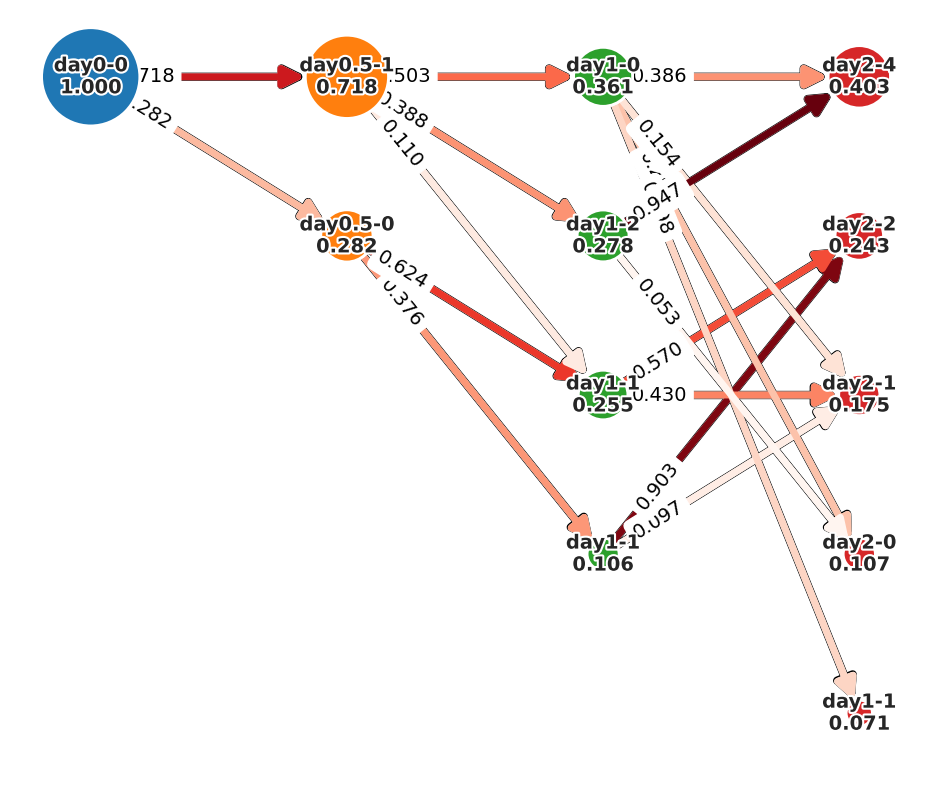

In [42]:
G.plot_simple_cell_state_graph(
    layout="hierarchy",
    y_position="weight",   
    # y_position=ypos_dict,
    weight_annotation="both",
    # order=None
)